# session6

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
data1 = pd.read_csv("gender_classification_v7.csv")
data1.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


### change column to 0 & 1

In [3]:
le = LabelEncoder()

In [4]:
data1['gender'] = le.fit_transform(data1['gender'])
data1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


### heatmap of correlation

In [5]:
data1.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


<Axes: >

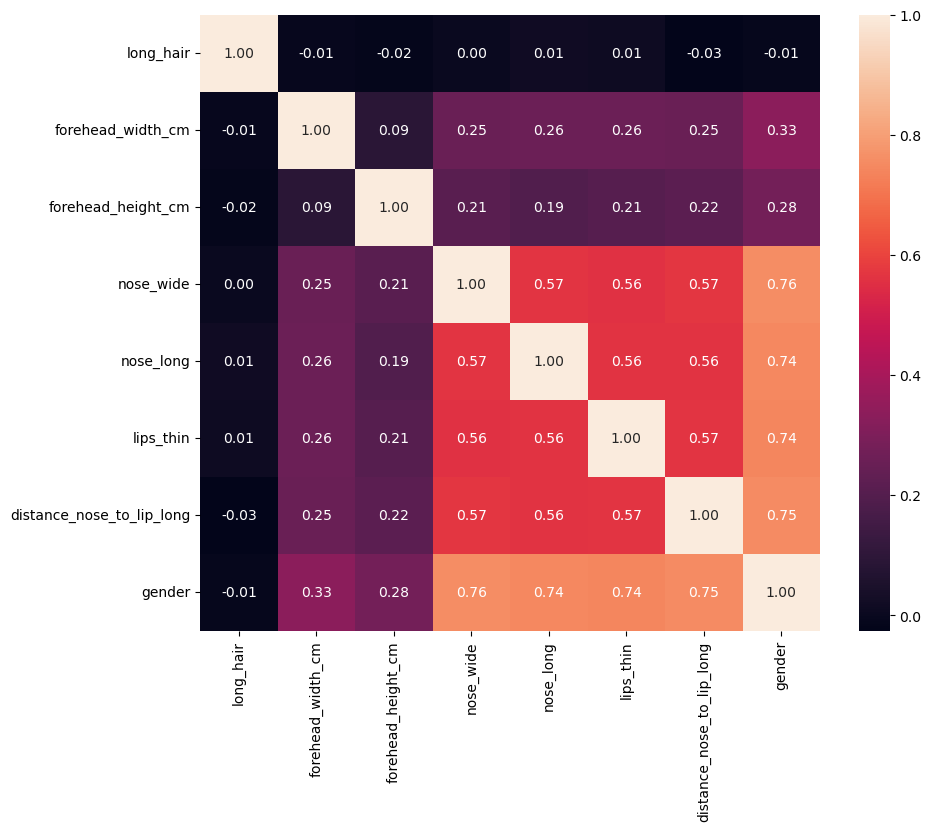

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data1.corr(),annot=True, fmt=".2f")

In [7]:
data1.long_hair.value_counts()

long_hair
1    4349
0     652
Name: count, dtype: int64

In [8]:
x1 = data1.iloc[:,:-1].values
y1 = data1.iloc[:,-1].values

### preprocessing

In [9]:
from sklearn import preprocessing

In [10]:
x1 = preprocessing.StandardScaler().fit(x1).transform(x1)

In [11]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split( x1, y1, test_size=0.2, random_state=0)

## code of LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
LR = LogisticRegression().fit(x1_train,y1_train)

In [14]:
y1_pred = LR.predict(x1_test)
y1_pred

array([0, 1, 1, ..., 0, 1, 0])

In [15]:
y1_Pred_prob = LR.predict_proba(x1_test)
y1_Pred_prob

array([[9.99936659e-01, 6.33411612e-05],
       [6.26543344e-04, 9.99373457e-01],
       [2.86592593e-02, 9.71340741e-01],
       ...,
       [9.99781642e-01, 2.18357964e-04],
       [3.95988483e-04, 9.99604012e-01],
       [9.99681689e-01, 3.18310685e-04]])

## accuracy_score

In [16]:
from sklearn.metrics import accuracy_score , f1_score

In [17]:
print("accuracy = ", accuracy_score(y1_test,y1_pred))

accuracy =  0.965034965034965


## f1_score

In [18]:
f1 = f1_score(y1_test,y1_pred)
print("f1_score = ", f1)

f1_score =  0.9636552440290758


## confusion matrix

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

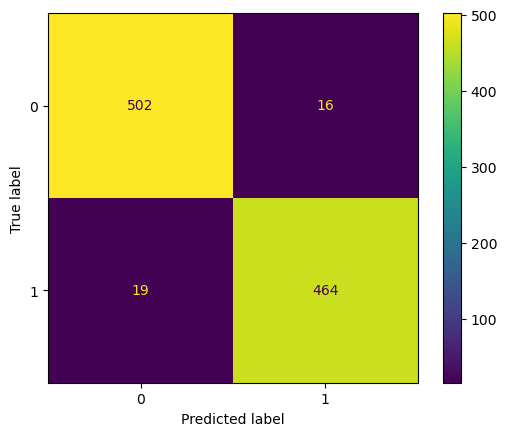

In [20]:
y1 = LogisticRegression().fit(x1_train, y1_train)
ConfusionMatrixDisplay.from_estimator(y1, x1_test, y1_test)

In [21]:
data1.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


# session7

## SVM

### kernel linerar

In [22]:
from sklearn import svm 
m = svm.SVC(kernel='linear')
m.fit(x1_train,y1_train)

SVC(kernel='linear')

##### accuracy

In [23]:
# Testing the model using the testing data 
y1_pred = m.predict(x1_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y1_test, y1_pred) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 96.2037962037962% accurate


##### heatmap

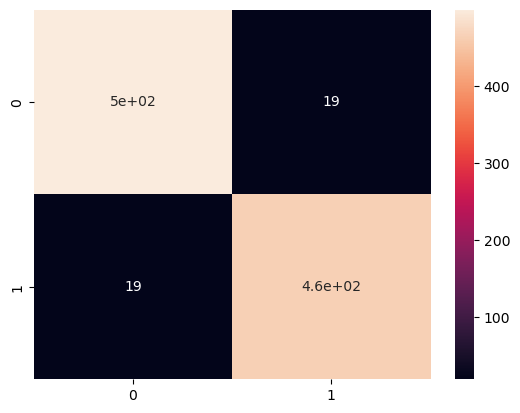

In [24]:
cnf  = confusion_matrix(y1_test,y1_pred)
sns.heatmap(cnf,annot=True)
plt.show()

##### f1_score

In [37]:
f1 = f1_score(y1_test,y1_pred,average=None)
print(f"The model is {f1*100}% accurate")
print(f"The model is {f1.mean()*100}% accurate")

The model is [96.33204633 96.06625259]% accurate
The model is 96.19914946001902% accurate


In [38]:
m1 = svm.SVC(kernel='linear',gamma=0.005,C=1000.0)
m1.fit(x1_train,y1_train)

SVC(C=1000.0, gamma=0.005, kernel='linear')

In [39]:
y2_pred = m1.predict(x1_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y1_test, y2_pred) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 96.30369630369631% accurate


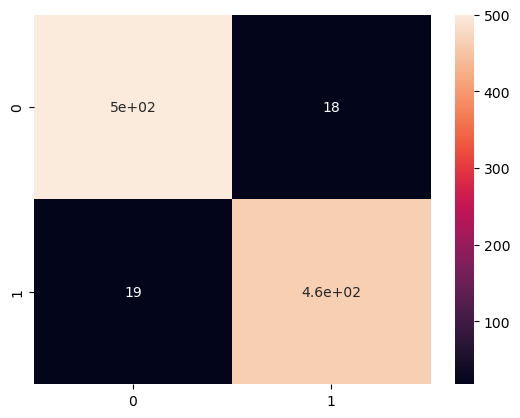

In [40]:
cnf  = confusion_matrix(y1_test,y2_pred)
sns.heatmap(cnf,annot=True)
plt.show()

In [41]:
f2 = f1_score(y1_test,y2_pred,average=None)
print(f"The model is {f2*100}% accurate")
print(f"The model is {f2.mean()*100}% accurate")

The model is [96.43201543 96.16580311]% accurate
The model is 96.29890926896539% accurate


### kernel RBF

In [28]:
from sklearn import svm 
m = svm.SVC(kernel='rbf')
m.fit(x1_train,y1_train)

SVC()

##### accuracy

In [29]:
# Testing the model using the testing data 
y2_pred = m.predict(x1_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y2_pred, y1_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 96.6033966033966% accurate


##### heatmap

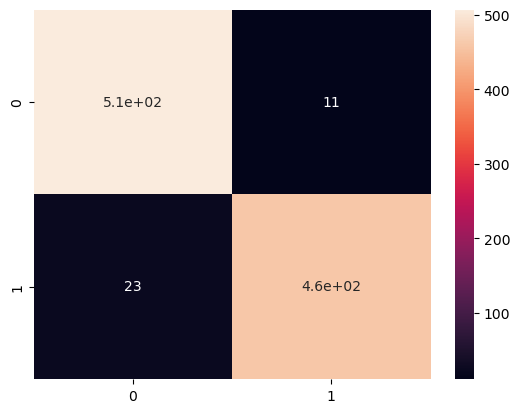

In [30]:
cnf  = confusion_matrix(y1_test,y2_pred)
sns.heatmap(cnf,annot=True)
plt.show()

##### f1_score

In [31]:
f1 = f1_score(y1_test,y2_pred,average=None)
print(f1)
print(f1.mean())

[0.96755725 0.96436059]
0.9659589194552467


# session 8

## neural network

In [32]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

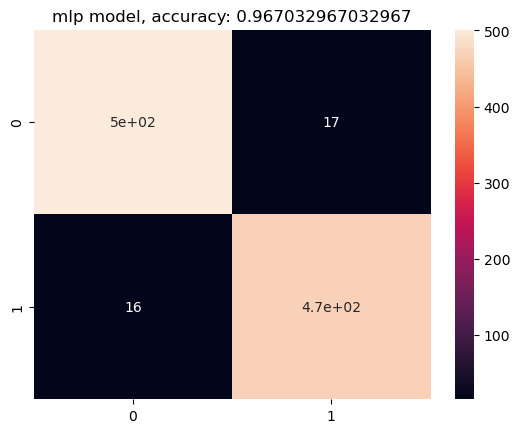

In [33]:
scaler = StandardScaler()
scaler.fit(x1_train)

x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)

mlp_model = MLPClassifier(
    max_iter=500,
    activation="relu",
    solver="adam",
    early_stopping= True,
    validation_fraction= 0.1
).fit(x1_train, y1_train)

y_pred = mlp_model.predict(x1_test)

cm = confusion_matrix(y1_test, y_pred)

sns.heatmap(cm, annot=True).set_title(
    f"mlp model, accuracy: {accuracy_score(y1_test, y_pred)}"
)
plt.show()

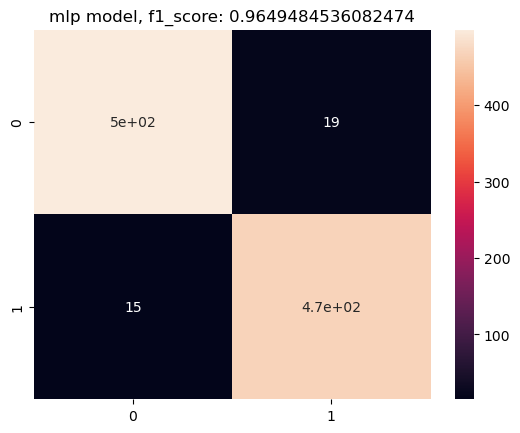

In [34]:
scaler = StandardScaler()
scaler.fit(x1_train)

x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)

mlp_model = MLPClassifier(
    max_iter=500,
    activation="relu",
    solver="adam",
    early_stopping= True,
    validation_fraction= 0.1
).fit(x1_train, y1_train)

y_pred = mlp_model.predict(x1_test)

cm = confusion_matrix(y1_test, y_pred)

sns.heatmap(cm, annot=True).set_title(
    f"mlp model, f1_score: {f1_score(y1_test, y_pred)}"
)
plt.show()